# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Definitions

In [2]:
base_path = "C:/Users/Zi/Documents/data-science-crossfit/"

# Feature Engineering

In [3]:
df_games_and_open = pd.read_csv(base_path + "csv_files/version_2_clean_data/df_games_and_open.csv")
df_games_and_open = df_games_and_open[df_games_and_open['year'] != 2023]

In [4]:
df_games_and_open

,competitorId,competitorName,firstName,lastName,gender,genderId,age,ageNull,height,heightNull,...,status,statusId,year,overallRank,overallScore,openCompetitor,openRank,openScore,gamesCompetitions,openCompetitions
0,1616,Russ Greene,Russ,Greene,M,1,20,0,178.000000,0,...,ACT,1,2007,11,232,0,140133,604776,1,0
1,1616,Russ Greene,Russ,Greene,M,1,21,0,178.000000,0,...,ACT,1,2008,53,21,0,140133,604776,2,0
2,1685,Christopher Woods,Christopher,Woods,M,1,29,0,163.000000,0,...,ACT,1,2008,32,19,0,140133,604776,1,0
3,1690,Travis Mayer,Travis,Mayer,M,1,23,0,181.000000,0,...,ACT,1,2014,29,483,1,17,566,1,1
4,1690,Travis Mayer,Travis,Mayer,M,1,25,0,181.000000,0,...,ACT,1,2016,10,702,1,3,86,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,2377148,Melanie Ward,Melanie,Ward,F,2,27,1,165.374825,1,...,ACT,1,2007,14,237,0,140133,604776,1,1
1710,2377149,Susan Kopcha,Susan,Kopcha,F,2,27,1,165.374825,1,...,WD,2,2007,16,162,0,140133,604776,1,1
1711,2377150,Melanie Ayres,Melanie,Ayres,F,2,27,1,165.374825,1,...,WD,2,2007,18,81,0,140133,604776,1,1
1712,2377151,Jaime Stumpf,Jaime,Stumpf,F,2,27,1,165.374825,1,...,WD,2,2007,19,76,0,140133,604776,1,1


### Mutual Information

In [5]:
def calculate_mi_scores(X, y, discrete_features):
    """
    Calculate Mutual Information (MI) scores for each feature in the dataset.

    Parameters:
        X (pd.DataFrame): Input data containing features.
        y (pd.Series): Target variable.
        discrete_features (pd.Series): Boolean Series indicating which features are discrete.

    Returns:
        pd.Series: MI scores for each feature, sorted in descending order.
    """
    # Compute mutual information scores
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    
    # Create a Series with MI scores, using column names as index
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    
    # Sort the MI scores in descending order
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores

# Select the relevant data and target variables
X = df_games_and_open.select_dtypes(include=np.number).copy()
y = X.pop('overallScore')

# Identify discrete features (integer columns)
discrete_features = X.dtypes == int

# Calculate MI scores using the calculate_mi_scores function
mi_scores = calculate_mi_scores(X, y, discrete_features)

# Output the MI scores
mi_scores

overallRank            0.937675
year                   0.908408
openScore              0.475088
countryOfOriginCode    0.471343
regionId               0.465290
openRank               0.444510
gamesCompetitions      0.404454
openCompetitor         0.324464
statusId               0.289323
competitorId           0.202971
affiliateId            0.173871
weight                 0.172098
height                 0.162669
bmi                    0.102214
bmiNull                0.097447
openCompetitions       0.082777
weightNull             0.082521
heightNull             0.080657
age                    0.048134
ageNull                0.045082
genderId               0.016958
Name: MI Scores, dtype: float64

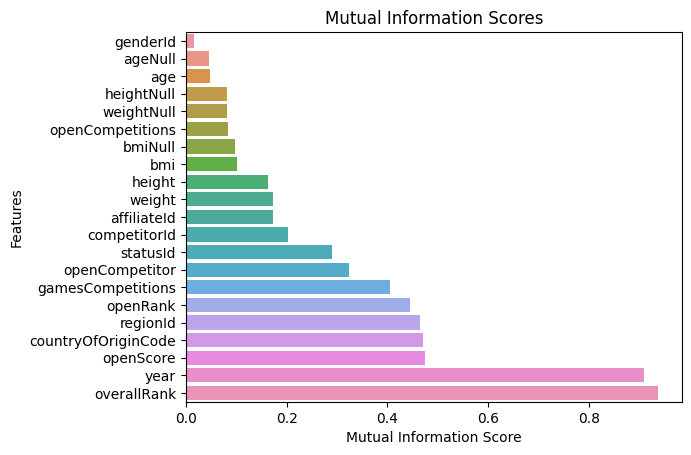

In [6]:
def plot_mi_scores(scores):
    """
    Plot Mutual Information (MI) scores for each feature in a horizontal bar chart.

    Parameters:
        scores (pd.Series): MI scores for each feature, sorted in ascending order.
    """
    # Sort the scores in ascending order
    scores = scores.sort_values(ascending=True)
    
    # Extract the scores and feature names as lists
    width = list(scores)
    ticks = list(scores.index)
    
    # Create a horizontal bar chart with Seaborn
    sns.barplot(x=width, y=ticks, orient='h')
    
    # Set the chart title
    plt.title("Mutual Information Scores")
    
    # Set the y-axis label
    plt.ylabel("Features")
    
    # Set the x-axis label
    plt.xlabel("Mutual Information Score")
    
    # Display the chart
    plt.show()

# Plot the MI scores
plot_mi_scores(mi_scores)

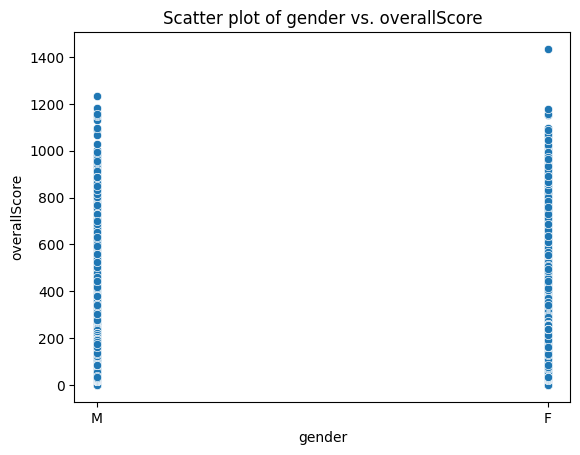

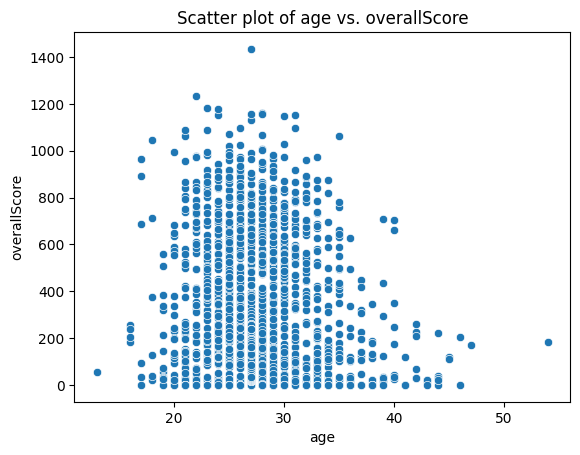

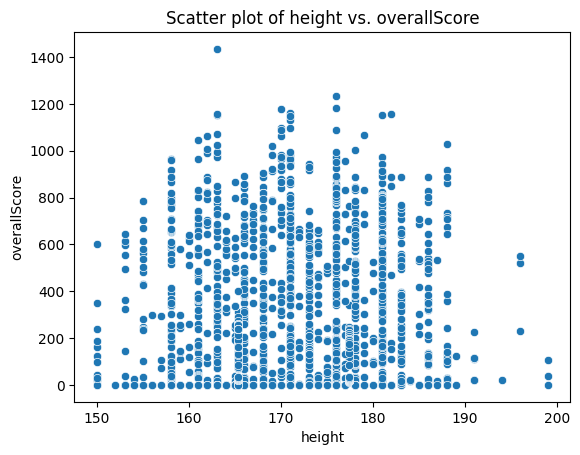

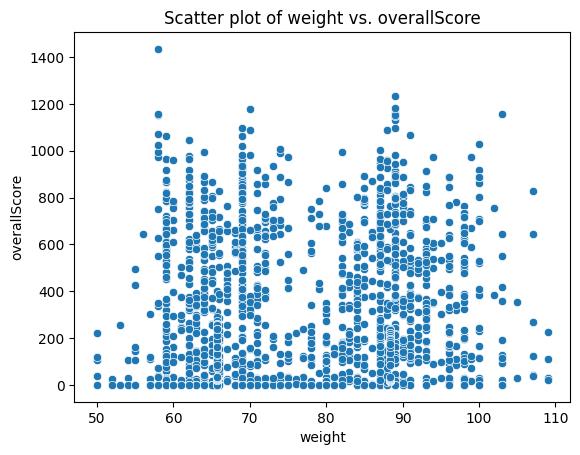

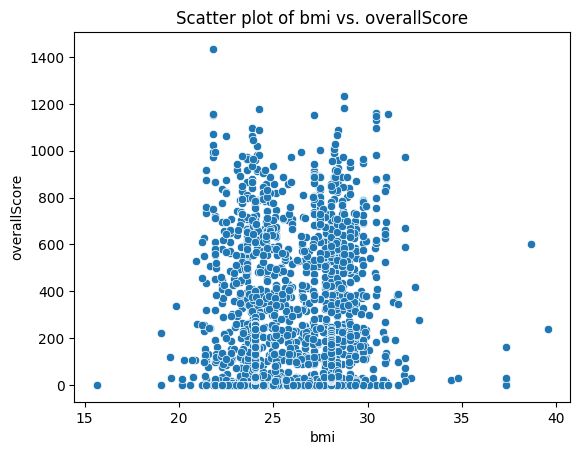

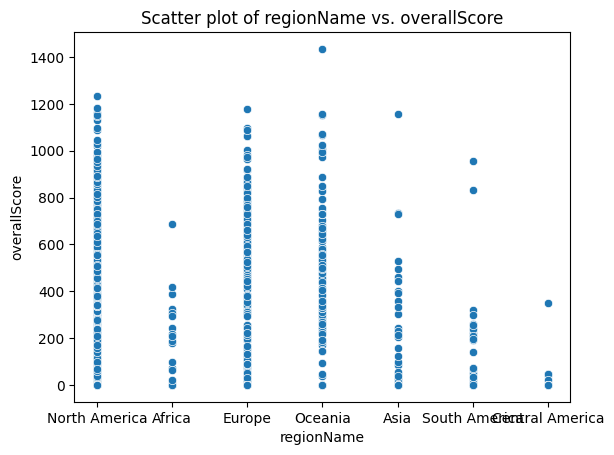

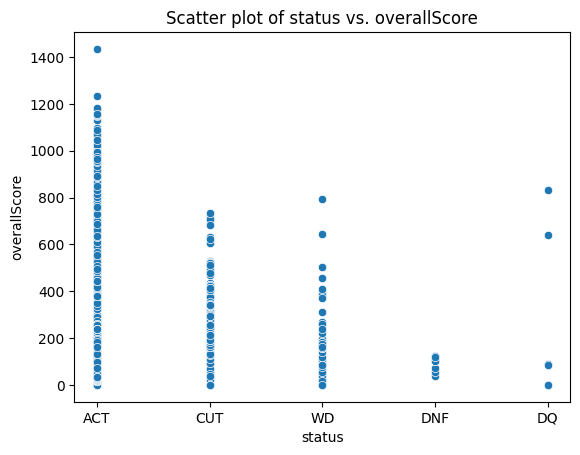

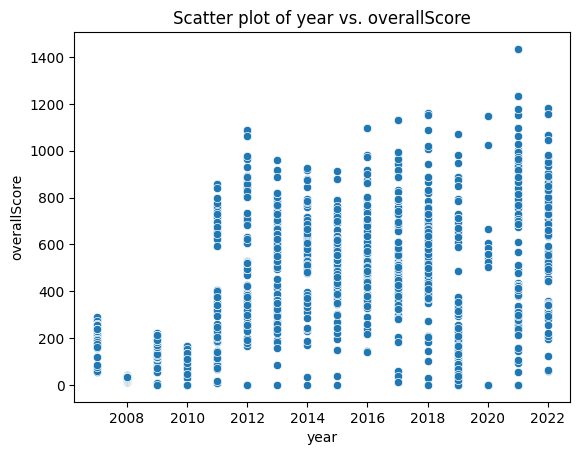

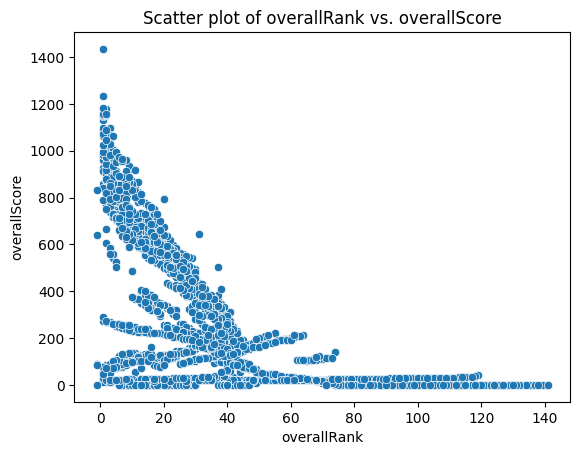

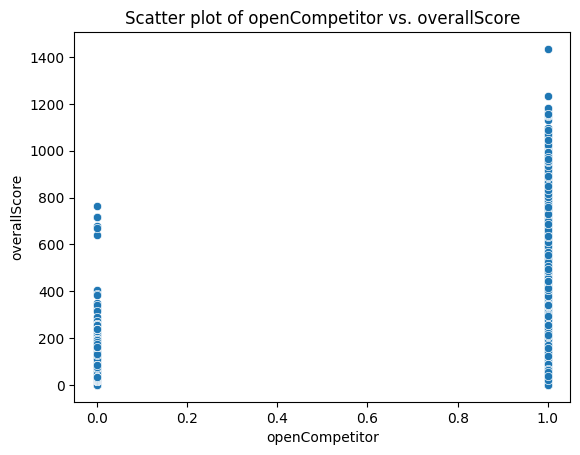

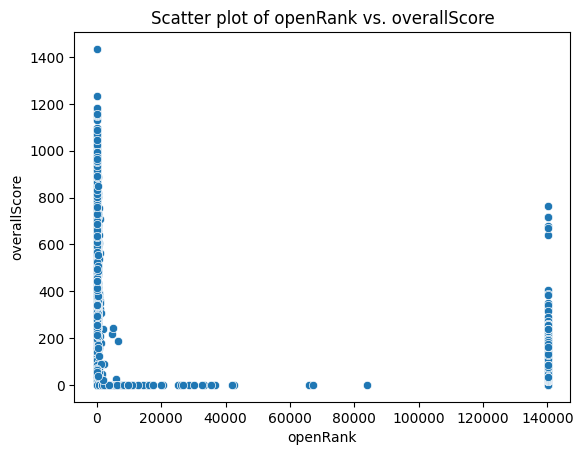

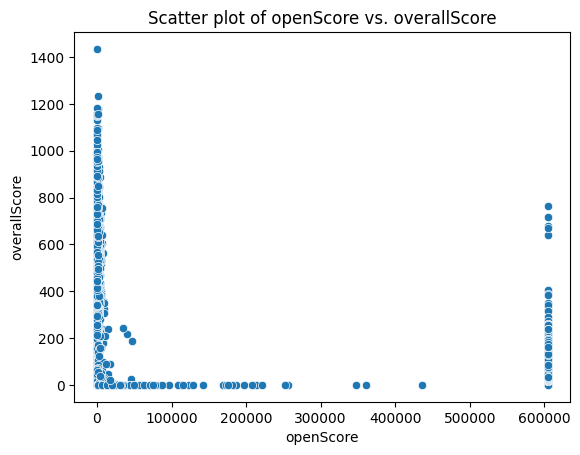

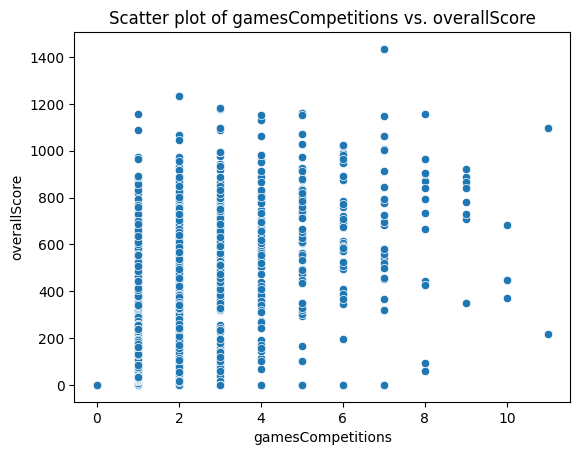

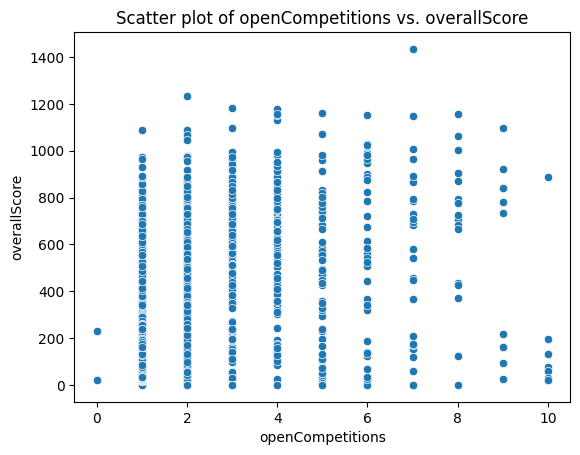

In [7]:
# Assuming df_games_and_open is the DataFrame containing your data
data = df_games_and_open[['gender', 'age', 'height', 'weight', 'bmi', 'regionName', 'status', 'year', 'overallRank',
                          'overallScore', 'openCompetitor', 'openRank', 'openScore', 'gamesCompetitions', 'openCompetitions']]

# Get the list of column names, excluding the 'overallScore' column
x_columns = [col for col in data.columns if col != 'overallScore']

# Create a scatter plot for each column
for column in x_columns:
    # Plot a scatter plot using Seaborn
    sns.scatterplot(x=column, y='overallScore', data=data)
    
    # Set the title for each plot
    plt.title(f'Scatter plot of {column} vs. overallScore')
    
    # Display the plot
    plt.show()